<a href="https://colab.research.google.com/github/Isaiah-Essien/heart_disease_prediction/blob/main/Heart_disease_summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease prediction

### This project aims to explore the implementation of Machine Learning Models with regularization, optimization, and Error analysis techniques used in machine learning to improve models' performance, convergence speed, and efficiency for the predicction of heart diseases.


Some of the concepts to be covered here are:
1. Data Exploration
2. Data cleaning, handling, and preprocessing
3. Standarization
5. Spliting
6. vanilla Model
7. Error analysis on Vanilla Model
8. Evaluation of vanilla model
9. Optimized model(with atleast 3 optimization techniques)
10. Error Analysis on Optimized Model
11. Evaluation of optimized Model
12. Summarry and discussions of results

In [1]:
!pip install tensorflow
!pip install keras

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.regularizers import l2

**Mount Drive**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data Exploration

In [4]:
#Load Dataset from Google drive
data= pd.read_csv('/content/drive/MyDrive/heart_disease_summative/heart.csv')

In [5]:
# Print first 10 rows
print (data.head(10))
print(data.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1 

In [6]:
#summarize the data
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [7]:
#check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
#Check for correlation
print(data.corr())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

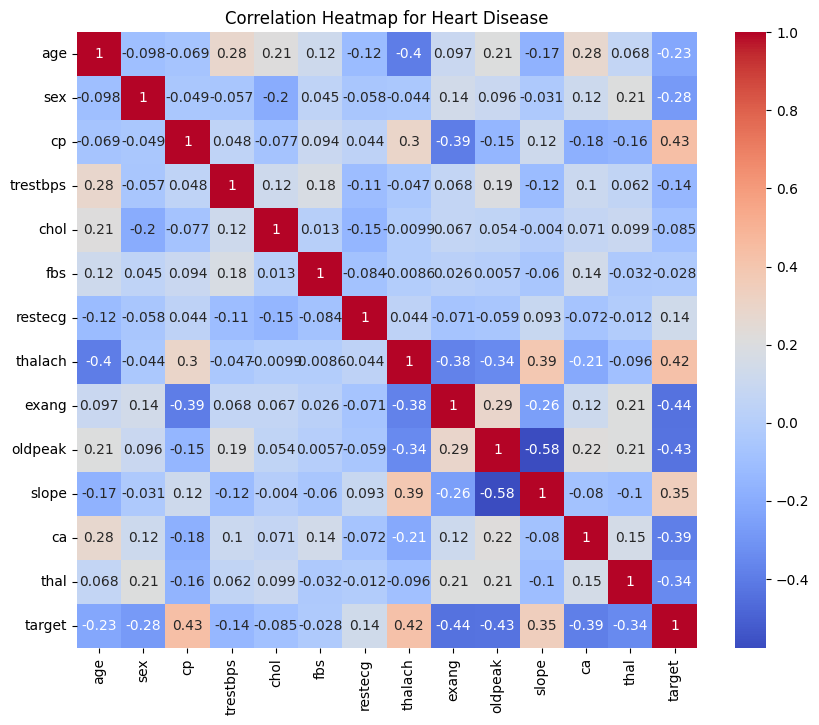

In [9]:
#Print correlation heat map
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Heart Disease')
plt.show()

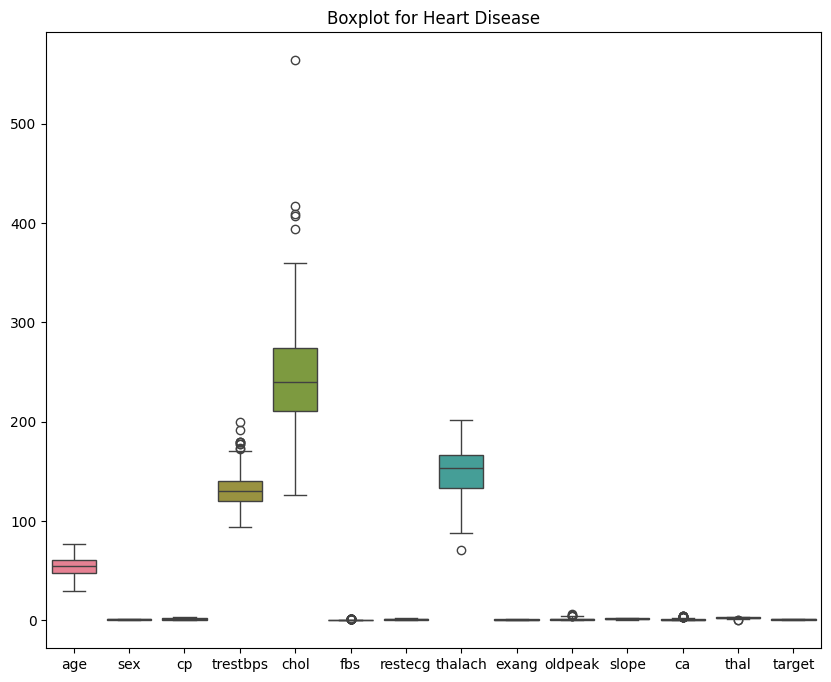

In [10]:
#Check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=data)
plt.title('Boxplot for Heart Disease')
plt.show()

## Data Handling and Preprocessing

In [11]:
#Feature Selection
X=data.drop('target', axis=1)
y=data['target']

#Split data into train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the data
scaler= MinMaxScaler()
X_train_Scaled= scaler.fit_transform(X_train)
X_test_Scaled= scaler.transform(X_test)

In [12]:
X_train_Scaled.shape

(242, 13)

In [13]:
X_test_Scaled.shape

(61, 13)

## Trian Vanilla Model without any optimizers

In [14]:
#Clear previous session
tf.keras.backend.clear_session()

# initialize the sequential model
vanilla_model=Sequential()

# Input layer
vanilla_model.add(Dense(64, activation='relu', input_dim=X_train_Scaled.shape[1]))

# Hidden layer 1
vanilla_model.add(Dense(32, activation='relu'))

# Hidden layer 2
vanilla_model.add(Dense(16, activation='relu'))

# Output layer
vanilla_model.add(Dense(1, activation='sigmoid'))

# Compile with a simple SDG
vanilla_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
# early_stop= EarlyStopping(monitor='val_loss', restore_best_weights=True, verbose=1, patience=5)

vanilla_model.summary()

# Fit the model
vanilla_model.fit(X_train_Scaled, y_train, epochs=150, validation_split=0.2,batch_size=32)

#Save the vanilla model
vanilla_model.save('/content/drive/MyDrive/heart_disease_summative/vanilla_heart_model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5344 - loss: 0.6886 - val_accuracy: 0.5714 - val_loss: 0.6712
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5391 - loss: 0.6878 - val_accuracy: 0.5714 - val_loss: 0.6710
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5469 - loss: 0.6797 - val_accuracy: 0.5714 - val_loss: 0.6691
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5603 - loss: 0.6773 - val_accuracy: 0.5714 - val_loss: 0.6674
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5518 - loss: 0.6791 - val_accuracy: 0.5714 - val_loss: 0.6671
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5563 - loss: 0.6804 - val_accuracy: 0.5714 - val_loss: 0.6673
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5458 - loss: 0.6739 - val_accuracy: 0.5714 - val_loss: 0.6654
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5592 - loss: 0.6738 - val_accuracy: 0.5714 - val_loss:

## Evaluate the  Vanilla model

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = vanilla_model.evaluate(X_test_Scaled, y_test)
print(f"Test Loss: {test_loss}\n, Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred_prob = vanilla_model.predict(X_test_Scaled)

# Convert probabilities to binary predictions (threshold > 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8074 - loss: 0.4590 
Test Loss: 0.43794316053390503
, Test Accuracy: 0.8360655903816223
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


## Error Analysis on the vanilla model

Confusion Matrix:
[[26  3]
 [ 7 25]]


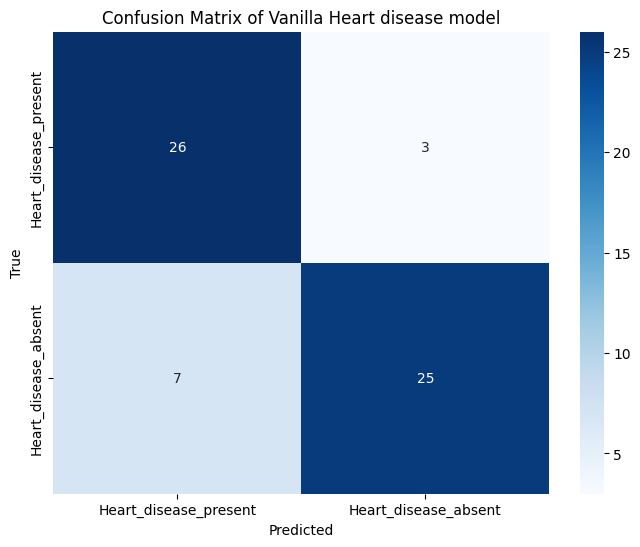

Classification Report:
                       precision    recall  f1-score   support

Heart_disease_present       0.79      0.90      0.84        29
 Heart_disease_absent       0.89      0.78      0.83        32

             accuracy                           0.84        61
            macro avg       0.84      0.84      0.84        61
         weighted avg       0.84      0.84      0.84        61



In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Heart_disease_present', 'Heart_disease_absent'], yticklabels=['Heart_disease_present', 'Heart_disease_absent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Vanilla Heart disease model')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Heart_disease_present', 'Heart_disease_absent']))

#Optimized Model Implementation

1. Optimizer- Adam
2. Erly stopping
3. Dropout
4. Kernel Initializers- uniform

In [17]:

# Clear previous session
tf.keras.backend.clear_session()

# Initialize the sequential model
optimized_model = Sequential()

# Input layer and first hidden layer with Dropout
optimized_model.add(Dense(128, input_dim=X_train_Scaled.shape[1], kernel_initializer='uniform', activation='relu'))
optimized_model.add(Dropout(0.4))

# Second hidden layer with Dropout
optimized_model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
optimized_model.add(Dropout(0.4))

# Third hidden layer with Dropout
optimized_model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
optimized_model.add(Dropout(0.4))


# Output layer (binary classification with sigmoid activation)
optimized_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Print model summary
optimized_model.summary()

# Compile the model with binary crossentropy loss and Adam optimizer
optimized_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback (optional, to avoid overfitting)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model on the training data (with validation split)
history = optimized_model.fit(X_train_Scaled, y_train, epochs=300, validation_split=0.2,
                              callbacks=[early_stop], batch_size=32)

# Save the optimized model
optimized_model.save('/content/drive/MyDrive/heart_disease_summative/optimized_heart_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5380 - loss: 0.6931 - val_accuracy: 0.5714 - val_loss: 0.6925
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5936 - loss: 0.6924 - val_accuracy: 0.5714 - val_loss: 0.6917
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5605 - loss: 0.6919 - val_accuracy: 0.5714 - val_loss: 0.6907
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6129 - loss: 0.6910 - val_accuracy: 0.8367 - val_loss: 0.6886
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7153 - loss: 0.6886 - val_accuracy: 0.8367 - val_loss: 0.6835
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7479 - loss: 0.6840 - val_accuracy: 0.8367 - val_loss: 0.6733
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7712 - loss: 0.6726 - val_accuracy: 0.8571 - val_loss: 0.6551
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7540 - loss: 0.6541 - val_accuracy: 0.7959 - val_loss: 0.630

## Evaluate the optimized model

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = optimized_model.evaluate(X_test_Scaled, y_test)
print(f"Test Loss: {test_loss}\n Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred_prob = optimized_model.predict(X_test_Scaled)

# Convert probabilities to binary predictions (threshold > 0.5)
y_pred_optimized = (y_pred_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8183 - loss: 0.4332 
Test Loss: 0.39682111144065857
 Test Accuracy: 0.8524590134620667
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


# Error Analysis on the Optimized model

Confusion Matrix:
[[26  3]
 [ 6 26]]


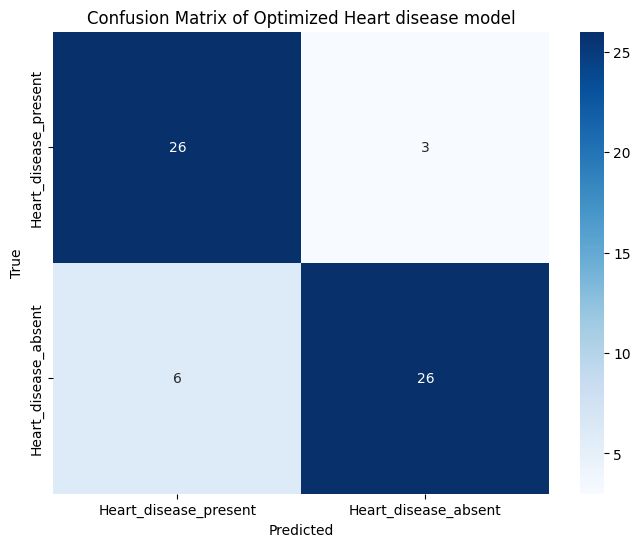

Classification Report:
                       precision    recall  f1-score   support

Heart_disease_present       0.81      0.90      0.85        29
 Heart_disease_absent       0.90      0.81      0.85        32

             accuracy                           0.85        61
            macro avg       0.85      0.85      0.85        61
         weighted avg       0.86      0.85      0.85        61



In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Heart_disease_present', 'Heart_disease_absent'], yticklabels=['Heart_disease_present', 'Heart_disease_absent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Optimized Heart disease model')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=['Heart_disease_present', 'Heart_disease_absent']))

# Discussion And Conclusion

## Comparison of Performance:
- Accuracy:

The optimized model achieved an accuracy of 83.61%, while the vanilla model reached 80.33%. The optimized model outperformed the vanilla model by a margin of about 3.3%.


- Loss:

The optimized model had a lower test loss (0.4006) compared to the vanilla model's test loss (0.4605), indicating better calibration of the optimized model's predictions.


- Confusion Matrix:

Both models had the same number of false positives (4). However, the optimized model had fewer false negatives (6 vs. 8), which means it did a better job identifying patients with heart disease.


- Classification Report:

The precision and recall for both classes improved slightly with the optimized model:
Heart Disease Present:
Precision improved from 0.76 to 0.81.
Recall remained the same at 0.86.
Heart Disease Absent:
Precision improved from 0.86 to 0.87.
Recall improved from 0.75 to 0.81.
The F1-scores and macro/weighted averages show the optimized model provided better balanced performance across both classes, with the macro and weighted averages improving from 0.80 to 0.84.


## Interpretation:
- Vanilla Model:

The vanilla model shows decent performance with an accuracy of 80.33%. However, it struggled slightly with identifying heart disease absence (lower recall), meaning it missed a few cases where heart disease wasn't present.


- Optimized Model:

The optimized model, with the addition of dropout, more hidden layers, and the Adam optimizer, outperformed the vanilla model. It showed higher precision and recall in predicting both heart disease presence and absence, leading to improved overall accuracy and better generalization on the test set.
The lower test loss indicates that the optimized model produces better-calibrated predictions, and its higher F1-scores demonstrate a more balanced classification performance between positive and negative classes.


## Conclusion:
The optimized model performed better across all key metrics—accuracy, loss, precision, recall, and F1-score—compared to the vanilla model. This suggests that the improvements (dropout layers, Adam optimizer, and deeper architecture) successfully enhanced the model's ability to generalize and accurately detect heart disease.